In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, roc_auc_score)
import pickle
from mlreg_client import Ml_registry
from plot_missing import plot_missing_values

<h2> Cargar el fichero

In [3]:
FILE = 'demo_file.csv'
target = 'Y'
df =pd.read_csv(FILE)
print(df.shape)
print(list(df.columns))

(1969, 8)
['FILTRO', 'AGR_FECHA', 'Y', 'max_sal_cre_top_cnv_con_rcc_u12m_T', 'sow_cre_top_sie_con_rcc_m1', 'med_sow_cre_top_cnv_rcc_u3m', 'sumprm_sal_cre_defdudper_rcc_u12m', 'BASE DETALLE']


In [4]:
var_list = ['max_sal_cre_top_cnv_con_rcc_u12m_T',
            'sow_cre_top_sie_con_rcc_m1', 
            'med_sow_cre_top_cnv_rcc_u3m',
            'sumprm_sal_cre_defdudper_rcc_u12m']

X = df[var_list]
y = df[target]

print(X.dtypes)
print(y.shape)

# Split the data into training and testing sets


max_sal_cre_top_cnv_con_rcc_u12m_T    float64
sow_cre_top_sie_con_rcc_m1            float64
med_sow_cre_top_cnv_rcc_u3m           float64
sumprm_sal_cre_defdudper_rcc_u12m     float64
dtype: object
(1969,)


<h3> Mirar los missing values

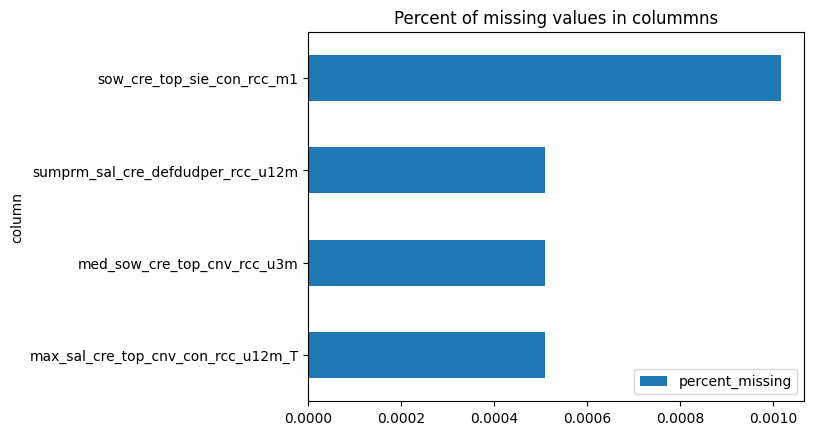

In [5]:
plot_missing_values(X)

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [8]:
#Separar train y valid
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)




In [10]:
print(X_train.shape)
print(X_test.shape)

(1575, 4)
(394, 4)


In [11]:
X_train_no_miss = imputer.fit_transform(X_train)

In [12]:
imputer.__dict__

{'missing_values': nan,
 'add_indicator': False,
 'keep_empty_features': False,
 'strategy': 'median',
 'fill_value': None,
 'copy': True,
 'feature_names_in_': array(['max_sal_cre_top_cnv_con_rcc_u12m_T', 'sow_cre_top_sie_con_rcc_m1',
        'med_sow_cre_top_cnv_rcc_u3m', 'sumprm_sal_cre_defdudper_rcc_u12m'],
       dtype=object),
 'n_features_in_': 4,
 '_fit_dtype': dtype('float64'),
 'indicator_': None,
 'statistics_': array([2.69589650e+04, 5.90865338e-01, 8.63629694e-01, 0.00000000e+00])}

In [14]:
model = LogisticRegression()
model.fit(X_train_no_miss,y_train)

LogisticRegression()

In [16]:
X_test_no_miss = imputer.transform(X_test)
pred = model.predict_proba(X_test_no_miss)

In [22]:
from sklearn.pipeline import Pipeline

model = Pipeline([('missing', imputer),
                  ('Logistic', LogisticRegression())])

model.fit(X_train, y_train)

my_pred = model.predict_proba(X_test)
my_pred


array([[0.97586784, 0.02413216],
       [0.98048001, 0.01951999],
       [0.95047812, 0.04952188],
       [0.94786513, 0.05213487],
       [0.97769314, 0.02230686],
       [0.94097099, 0.05902901],
       [0.98519823, 0.01480177],
       [0.98805758, 0.01194242],
       [0.96233017, 0.03766983],
       [0.95576328, 0.04423672],
       [0.97816875, 0.02183125],
       [0.97898462, 0.02101538],
       [0.96277841, 0.03722159],
       [0.96556932, 0.03443068],
       [0.98915912, 0.01084088],
       [0.97849017, 0.02150983],
       [0.96607722, 0.03392278],
       [0.95950385, 0.04049615],
       [0.95245424, 0.04754576],
       [0.98023563, 0.01976437],
       [0.96753115, 0.03246885],
       [0.96184369, 0.03815631],
       [0.98303069, 0.01696931],
       [0.98367333, 0.01632667],
       [0.9766826 , 0.0233174 ],
       [0.9758025 , 0.0241975 ],
       [0.97426658, 0.02573342],
       [0.98860365, 0.01139635],
       [0.95691714, 0.04308286],
       [0.95428268, 0.04571732],
       [0.

In [23]:
MODEL_PICKLE_NAME = "model.pickle"

with open(MODEL_PICKLE_NAME, "wb") as output_file:
    pickle.dump(model, output_file)

In [26]:
MODEL_NAME = "Logistic Pipeline"
MODEL_DESCRIPTION = "Modelo simple para demo"
TARGET_DESC = "Probabilidad default"

VARIABLES = ', '.join(f"'{i}'" for i in var_list)


data = {"model_name": MODEL_NAME,
            "model_description": MODEL_DESCRIPTION,
            "version_name":'Logistic regression v1',
            "version_description" : MODEL_DESCRIPTION,
         
            "parameters" : "'type': 'logistic','Feature selection':'None'",
            "variables": VARIABLES,
            "target_desc":TARGET_DESC
          }


ml_r = Ml_registry(company_id=3, user_id=1,bucket_name='modelfactorymarcos',bucket_folder = 'demo_septiembre',client_secret='/Users/marcosdurbano/Documents/marcos/python/demo_mlops/secret/client_secret.json')

r = ml_r.create_model_version(**data)
ml_r.upload_model(MODEL_PICKLE_NAME)
model_id = ml_r.get_model_by_name(MODEL_NAME).get('data').get('id')
ml_r.change_status(r.get('model_id'),r.get('version'),status='PROD')

# Agregar los resultados de la validaccion

from datetime import date
today = date.today().strftime('%Y-%m-%d')
version_id= r.get('version_id')

ml_r.track_version( version_id, today, 'AUC', str(auc))



INFO:root:Sending this data {'model_name': 'Logistic Pipeline', 'model_description': 'Modelo simple para demo', 'version_name': 'Logistic regression v1', 'version_description': 'Modelo simple para demo', 'version_parameters': "'type': 'logistic','Feature selection':'None'", 'variables': "'max_sal_cre_top_cnv_con_rcc_u12m_T', 'sow_cre_top_sie_con_rcc_m1', 'med_sow_cre_top_cnv_rcc_u3m', 'sumprm_sal_cre_defdudper_rcc_u12m'", 'user_id': 1, 'company_id': 3, 'bucket_folder': 'demo_septiembre', 'pipeline_id': None, 'target_desc': 'Probabilidad default'}
INFO:root:The artifacts path is 'demo_septiembre/Logistic Pipeline/v2/'
INFO:root:uploading 'model.pickle' to demo_septiembre/Logistic Pipeline/v2/model.pkl


INFO:root:Sending this data {'version_id': 2, 'status': 'PROD'}
INFO:root:Sending this data {'user_id': 1, 'validation_dt': '2023-09-26', 'stat_name': 'AUC', 'data': '0.7111406619385342'}


{'message': 'Updated version 2 to PROD'}


NameError: name 'accuracy' is not defined

In [29]:
ml_r.track_version( version_id, today, 'AUC', str(auc))

INFO:root:Sending this data {'user_id': 1, 'validation_dt': '2023-09-26', 'stat_name': 'AUC', 'data': '0.5838885523924895'}


{'message': 'New AUC recorded for version 2 '}

In [25]:
auc= roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("AUC:",auc)

pred = pd.DataFrame(model.predict_proba(X))
pd.concat([pred.reset_index(drop=True),y.reset_index(drop=True)],axis=1)

AUC: 0.7111406619385342


,0,1,Y
0,0.956148,0.043852,0
1,0.971681,0.028319,0
2,0.978540,0.021460,0
3,0.947663,0.052337,1
4,0.991349,0.008651,0
...,...,...,...
1964,0.970990,0.029010,0
1965,0.958026,0.041974,0
1966,0.965734,0.034266,0
1967,0.941363,0.058637,0


In [27]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf = Pipeline([
    ('Replace Missing', SimpleImputer(strategy='median')),
    ('estimator' , RandomForestClassifier())
    ])


# Train the model on the training data
model_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model_rf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

auc= roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
print("AUC:",auc)

pred = pd.DataFrame(model_rf.predict_proba(X))
pd.concat([pred.reset_index(drop=True),y.reset_index(drop=True)],axis=1)

Accuracy: 0.9619289340101523
AUC: 0.5838885523924895


,0,1,Y
0,0.99,0.01,0
1,0.99,0.01,0
2,0.99,0.01,0
3,0.36,0.64,1
4,1.00,0.00,0
...,...,...,...
1964,1.00,0.00,0
1965,1.00,0.00,0
1966,1.00,0.00,0
1967,1.00,0.00,0


In [28]:
MODEL_PICKLE_NAME = "model_rf.pickle"

with open(MODEL_PICKLE_NAME, "wb") as output_file:
    pickle.dump(model_rf, output_file)

MODEL_NAME = "Logistic Pipeline"
MODEL_DESCRIPTION = "Modelo simple para demo"
TARGET_DESC = "Probabilidad default"

VARIABLES = ', '.join(f"'{i}'" for i in var_list)


data = {"model_name": MODEL_NAME,
            "model_description": MODEL_DESCRIPTION,
            "version_name":'Random Forest test',
            "version_description" : MODEL_DESCRIPTION,
         
            "parameters" : "'type': 'RF','Feature selection':'None'",
            "variables": VARIABLES,
            "target_desc":TARGET_DESC
          }


ml_r = Ml_registry(company_id=3, user_id=1,bucket_name='modelfactorymarcos',bucket_folder = 'demo_septiembre',client_secret='/Users/marcosdurbano/Documents/marcos/python/demo_mlops/secret/client_secret.json')

r = ml_r.create_model_version(**data)
ml_r.upload_model("model_rf.pickle")
model_id = ml_r.get_model_by_name(MODEL_NAME).get('data').get('id')
ml_r.change_status(r.get('model_id'),r.get('version'),status='PROD')

INFO:root:Sending this data {'model_name': 'Logistic Pipeline', 'model_description': 'Modelo simple para demo', 'version_name': 'Random Forest test', 'version_description': 'Modelo simple para demo', 'version_parameters': "'type': 'RF','Feature selection':'None'", 'variables': "'max_sal_cre_top_cnv_con_rcc_u12m_T', 'sow_cre_top_sie_con_rcc_m1', 'med_sow_cre_top_cnv_rcc_u3m', 'sumprm_sal_cre_defdudper_rcc_u12m'", 'user_id': 1, 'company_id': 3, 'bucket_folder': 'demo_septiembre', 'pipeline_id': None, 'target_desc': 'Probabilidad default'}
INFO:root:The artifacts path is 'demo_septiembre/Logistic Pipeline/v3/'
INFO:root:uploading 'model_rf.pickle' to demo_septiembre/Logistic Pipeline/v3/model.pkl
INFO:root:Sending this data {'version_id': 3, 'status': 'PROD'}


{'message': 'Updated version 3 to PROD'}
